<a href="https://colab.research.google.com/github/erico-bachour/erico-bachour/blob/main/Controle_de_Peso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importação de bibliotecas básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
#autenticação de Usuário Google - Google Colab 
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [3]:
#importar database do Google Sheets
worksheet = gc.open('Controle de Peso').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

#Definir DataFrame
controle = pd.DataFrame.from_records(rows)

#Redefir índice
controle.columns = (controle.loc[0])
controle.drop(0, axis=0, inplace=True)
controle.reset_index(inplace=True)
controle.drop('index', axis=1, inplace=True)
controle.set_index('Data', inplace=True)

#Tratar variável 'Peso'
controle['Peso(Kg)'] = controle['Peso(Kg)'].astype(str)
controle['Peso(Kg)']  = controle['Peso(Kg)'].str.replace(',', '.')
controle['Peso(Kg)']  = pd.to_numeric(controle['Peso(Kg)'])

#Tratar variável 'Treino no dia anterior'
controle['Treino (Km)'] = controle['Treino (Km)'].astype(str)
controle['Treino (Km)']  = controle['Treino (Km)'].str.replace(',', '.')

#Criar variável 'Atividade Física' ('Treino ou Academia)
controle['Atividade Física'] = controle['Treino (Km)'] + controle['Academia']
controle['Atividade Física'] = pd.to_numeric(controle['Atividade Física'])
controle['Atividade Física'] = controle['Atividade Física'].notnull()

#Tratar variável 'Variação nominal diária de peso'
controle['Variação (Kg)'] = controle['Variação (Kg)'].astype(str)
controle['Variação (Kg)']  = controle['Variação (Kg)'].str.replace(',', '.')
controle['Variação (Kg)']  = pd.to_numeric(controle['Variação (Kg)'])
controle['Variação (Kg)'] =  controle['Variação (Kg)'].where(controle['Variação (Kg)'] > -3, other= 0)

#Definindo linha de tendência (Média Móvel)
controle['Média Móvel'] = controle['Peso(Kg)'].rolling(5).mean()

[['Data', 'Dia da Semana', 'Peso(Kg)', 'Variação (Kg)', 'Variação %', 'Academia', 'Treino (Km)'], ['26/10', 'terça-feira', '90,40', '', '', '', ''], ['27/10', 'quarta-feira', '89,90', '-0,50', '-0,55%', '', ''], ['28/10', 'quinta-feira', '89,50', '-0,40', '-0,44%', '', '3,99'], ['29/10', 'sexta-feira', '89,20', '-0,30', '-0,34%', '', ''], ['30/10', 'sábado', '88,50', '-0,70', '-0,78%', '', ''], ['31/10', 'domingo', '89,80', '1,30', '1,47%', '', ''], ['1/11', 'segunda-feira', '89,70', '-0,10', '-0,11%', '', ''], ['2/11', 'terça-feira', '90,20', '0,50', '0,56%', '', ''], ['3/11', 'quarta-feira', '88,40', '-1,80', '-2,00%', '', ''], ['4/11', 'quinta-feira', '87,90', '-0,50', '-0,57%', '', '4,36'], ['5/11', 'sexta-feira', '88,30', '0,40', '0,46%', '', '5,21'], ['6/11', 'sábado', '88,90', '0,60', '0,68%', '', '4,59'], ['7/11', 'domingo', '90,00', '1,10', '1,24%', '', ''], ['8/11', 'segunda-feira', '88,50', '-1,50', '-1,67%', '', '4,35'], ['9/11', 'terça-feira', '88,25', '-0,25', '-0,28%', '

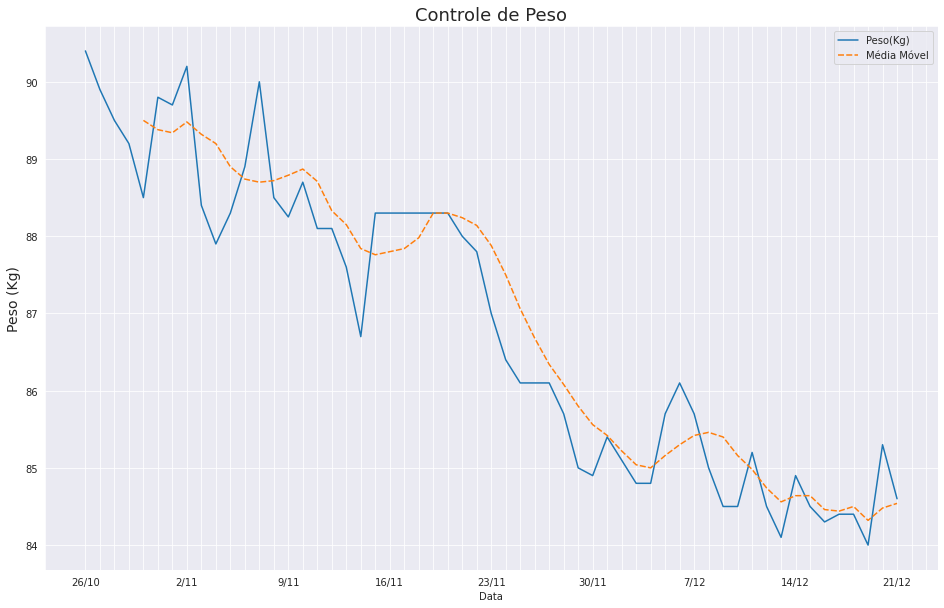

In [28]:
#Controle do Peso com Média Móvel

plt.figure(figsize=(16,10))
ax1 = sns.lineplot(data=[controle['Peso(Kg)'], controle['Média Móvel']])
ax1.set_title('Controle de Peso', fontsize=18)
for index, label in enumerate(ax1.get_xticklabels()):
   if index % 7 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
ax1.set_ylabel('Peso (Kg)', fontsize=14)
ax1

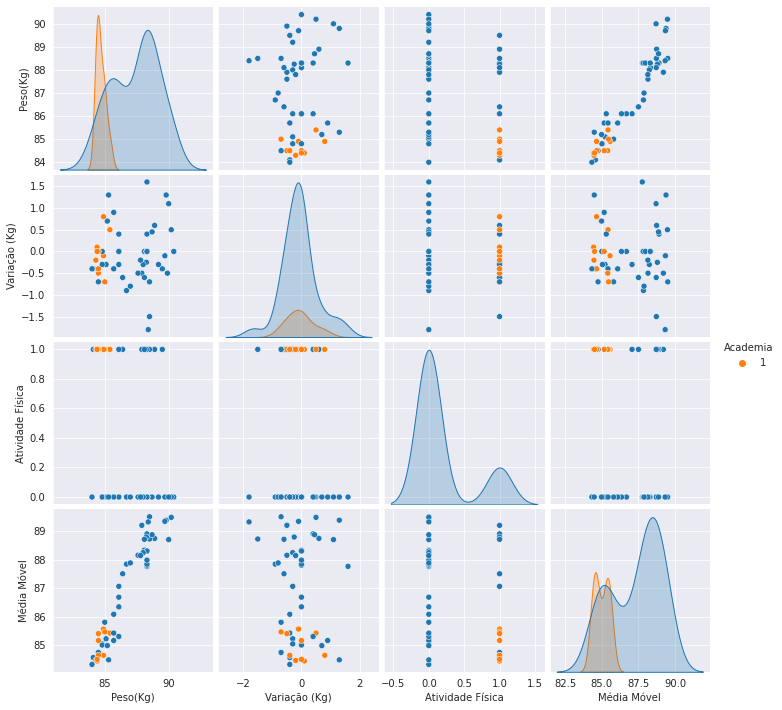

In [ ]:
#Dispersão das variáveis entre as mesmas, com marcação de ida na Academia no dia anterior
ax2 = sns.pairplot(data=controle, hue='Academia')

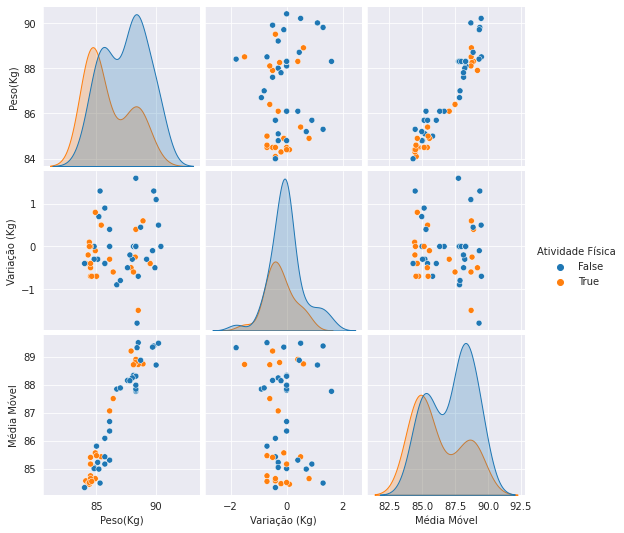

In [5]:
#Dispersão das variáveis entre as mesmas, com marcação de Atividade Física no dia anterior
ax3 = sns.pairplot(data=controle, hue='Atividade Física')

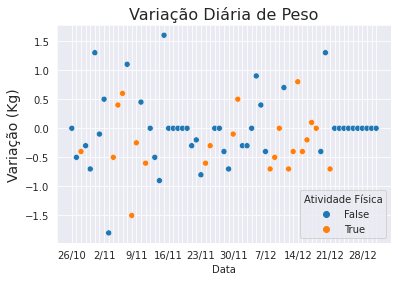

In [26]:
#Dispersão da variável 'Variação nominal diária de peso', com marcação de Atividade Física no dia anterior. 
ax4 = sns.scatterplot(data = controle, x='Data', y = 'Variação (Kg)', hue = 'Atividade Física')
ax4.set_title('Variação Diária de Peso', fontsize=16)
#ax4.set_xlabel('Data', fontsize=8)
#ax4.set(xticks=[])
for index, label in enumerate(ax4.get_xticklabels()):
   if index % 7 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
ax4.set_ylabel('Variação (Kg)', fontsize=14)
ax4

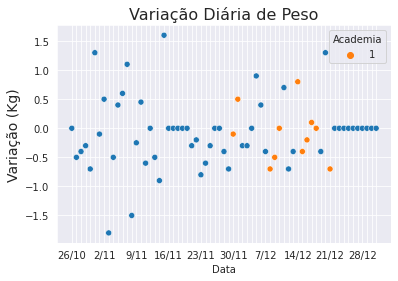

In [27]:
#Dispersão da variável 'Variação nominal diária de peso', com marcação de Academia no dia anterior. 
ax5 = sns.scatterplot(data = controle, x='Data', y = 'Variação (Kg)', hue = 'Academia')
ax5.set_title('Variação Diária de Peso', fontsize=16)
for index, label in enumerate(ax5.get_xticklabels()):
   if index % 7 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
ax5.set_ylabel('Variação (Kg)', fontsize=14)
ax5

In [9]:
controle.corr()

,Peso(Kg),Variação (Kg),Atividade Física,Média Móvel
0,,,,
Peso(Kg),1.000000,0.114113,-0.356418,0.952687
Variação (Kg),0.114113,1.000000,-0.193750,-0.051274
Atividade Física,-0.356418,-0.193750,1.000000,-0.266587
Média Móvel,0.952687,-0.051274,-0.266587,1.000000


In [10]:
controle[51:54]

,Dia da Semana,Peso(Kg),Variação (Kg),Variação %,Academia,Treino (Km),Atividade Física,Média Móvel
Data,,,,,,,,
16/12,quinta-feira,84.3,-0.2,"-0,24%",1,,True,84.46
17/12,sexta-feira,84.4,0.1,"0,12%",1,,True,84.44
18/12,sábado,84.4,0.0,"0,00%",1,,True,84.50


In [13]:
 controle['Variação (Kg)'].groupby()

TypeError: ignored